In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x0 = int(input("Enter the point x0: "))
y0 = int(input("Enter the point y0: "))
z0 = int(input("Enter the point z0: "))
x1 = int(input("Enter the point x1: "))
y1 = int(input("Enter the point y1: "))
z1 = int(input("Enter the point z1: "))
theta= np.radians(int(input('Enter angle to rotate: ')))

Enter the point x0:  2
Enter the point y0:  1
Enter the point z0:  0
Enter the point x1:  3
Enter the point y1:  3
Enter the point z1:  1
Enter angle to rotate:  90


In [3]:
def plot_cube(vertices, edges, axis_line=None, ax=None, title=""):
    """Plot cube and rotation axis"""
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='blue')
  
    for edge in edges:
        ax.plot([vertices[edge[0], 0], vertices[edge[1], 0]],
                [vertices[edge[0], 1], vertices[edge[1], 1]],
                [vertices[edge[0], 2], vertices[edge[1], 2]], 'b-')

  
    if axis_line is not None:
        ax.plot([axis_line[0], axis_line[3]],
                [axis_line[1], axis_line[4]],
                [axis_line[2], axis_line[5]], 'r--', linewidth=2, label='Rotation Axis')
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

    
    ax.set_box_aspect([1, 1, 1])
    return ax

In [4]:
def create_cube():
    """Create vertices and edges of a cube"""
    vertices = np.array([
        [0, 0, 0, 1],
        [1, 0, 0, 1],
        [1, 1, 0, 1],
        [0, 1, 0, 1],
        [0, 0, 1, 1],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [0, 1, 1, 1]
    ])
    edges = [
        [0, 1], [1, 2], [2, 3], [3, 0],
        [4, 5], [5, 6], [6, 7], [7, 4],
        [0, 4], [1, 5], [2, 6], [3, 7]
    ]
    return vertices, edges

In [5]:
normalized = np.sqrt((x1-x0)**2+(y1-y0)**2+(z1-z0)**2)
a = (x1-x0)/normalized
b = (y1-y0)/normalized
c = (z1-z0)/normalized
d = np.sqrt(b**2+c**2)

In [6]:
t = np.array([[1, 0, 0,-x0], [0, 1,0, -y0], [0, 0,1, -z0],[0,0,0,1]])
rx = np.array([[1,0, 0,0],[0,c/d, -b/d,0],[0, b/d, c/d,0],[0,0,0,1]])
ry = np.array([[d,0,-a,0],[0,1,0,0],[a,0,d,0],[0,0,0,1]])
rotation_matrix_z = np.array([[np.cos(theta), -np.sin(theta), 0,0],[np.sin(theta), np.cos(theta), 0,0],[0, 0, 1,0],[0,0,0,1]])
Ry = np.array([[d,0,a,0],[0,1,0,0],[-a,0,d,0],[0,0,0,1]])
Rx = np.array([[1,0, 0,0],[0,c/d, b/d,0],[0, -b/d, c/d,0],[0,0,0,1]])
T = np.array([[1, 0, 0,x0], [0, 1,0, y0], [0, 0,1, z0],[0,0,0,1]])

In [7]:
CM = T @ Rx @ Ry @ rotation_matrix_z @ ry @ rx @ t
vertices,edges=create_cube()
homogenous_vertices = np.hstack((vertices[:, :3], np.ones((vertices.shape[0], 1))))
transformed = CM @ homogenous_vertices.T
transformed.T[:, :3]

array([[ 1.74158162, -1.14982991,  0.5580782 ],
       [ 1.90824829, -0.40824829, -0.09175171],
       [ 1.83333333,  0.25841838,  0.64982991],
       [ 1.66666667, -0.48316325,  1.29965983],
       [ 2.72474487, -1.22474487,  0.72474487],
       [ 2.89141154, -0.48316325,  0.07491496],
       [ 2.81649658,  0.18350342,  0.81649658],
       [ 2.64982991, -0.5580782 ,  1.4663265 ]])

In [8]:
homogenous_vertices

array([[0., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 0., 1., 1.],
       [1., 0., 1., 1.],
       [1., 1., 1., 1.],
       [0., 1., 1., 1.]])

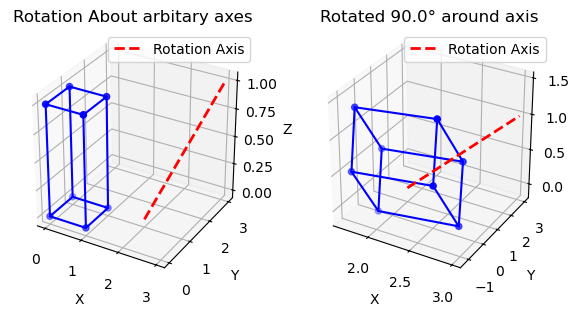

In [9]:

fig = plt.figure(figsize=(7, 5))
    # Original cube
ax1 = fig.add_subplot(121, projection='3d')
plot_cube(vertices, edges, axis_line=[x0, y0, z0, x1, y1, z1], ax=ax1, title="Rotation About arbitary axes")
ax2 = fig.add_subplot(122, projection='3d')
plot_cube(transformed.T[:, :3], edges, [x0, y0, z0, x1, y1, z1], ax2, f"Rotated {theta*180/np.pi}° around axis")
plt.savefig("output.png")
plt.show()